<a href="https://colab.research.google.com/github/idubey-code/cs480student/blob/main/CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

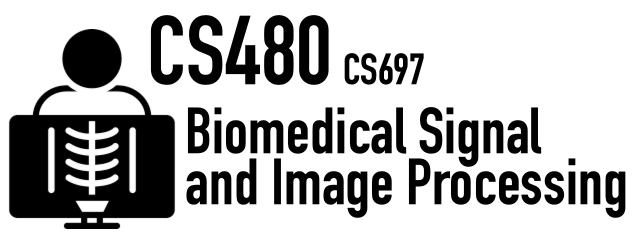
#Assignment 4

In [1]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7 MB 7.9 MB/s 


In [4]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [5]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [6]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [7]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [8]:
# TODO: Please display this image and print the dimensions!

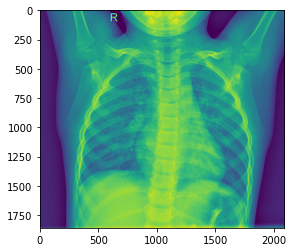

In [9]:
# TODO: YOUR CODE
from pylab import imshow, show

imshow(img)
show()

In [10]:
print("Dimensions of the image are:",img.shape)

Dimensions of the image are: (1858, 2090)


**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [11]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [12]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [13]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) YOUR ANSWER
# TODO: Operation 2) YOUR ANSWER



1.   **Operation 1**: The first operation is resizing images into 300x300 pixels. This is done to keep the size of each image consistent and the original sizes can vary.
2.   **Operation 2**: The second operation is storing the images into a 3D numpy array. This is done to give images as an input to the machine learning model.



In [14]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [15]:
# TODO: YOUR CODE

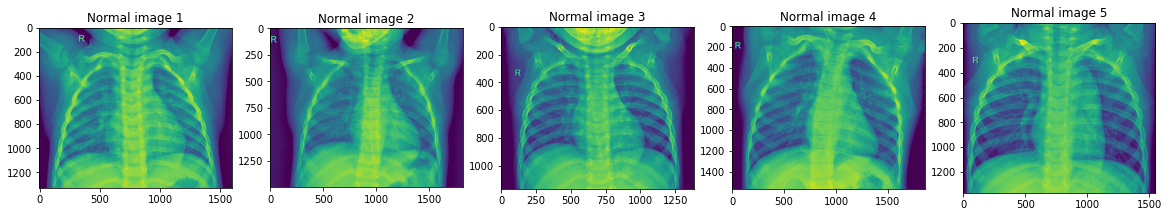

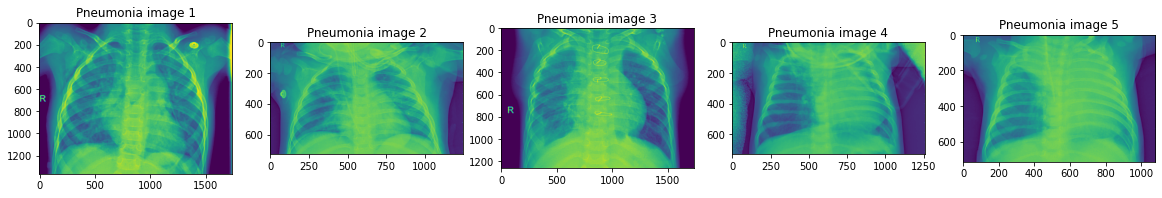

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,5,figsize=(20,20))

axs[0].imshow(mh.imread(NORMAL_DIR + normal_files[0]));
axs[0].set_title("Normal image 1");
axs[1].imshow(mh.imread(NORMAL_DIR + normal_files[1]));
axs[1].set_title("Normal image 2");
axs[2].imshow(mh.imread(NORMAL_DIR + normal_files[2]));
axs[2].set_title("Normal image 3");
axs[3].imshow(mh.imread(NORMAL_DIR + normal_files[3]));
axs[3].set_title("Normal image 4");
axs[4].imshow(mh.imread(NORMAL_DIR + normal_files[4]));
axs[4].set_title("Normal image 5");

fig1, axs1 = plt.subplots(1,5,figsize=(20,20))

axs1[0].imshow(mh.imread(PNEUMONIA_DIR + pneumonia_files[0]));
axs1[0].set_title("Pneumonia image 1");
axs1[1].imshow(mh.imread(PNEUMONIA_DIR + pneumonia_files[1]));
axs1[1].set_title("Pneumonia image 2");
axs1[2].imshow(mh.imread(PNEUMONIA_DIR + pneumonia_files[2]));
axs1[2].set_title("Pneumonia image 3");
axs1[3].imshow(mh.imread(PNEUMONIA_DIR + pneumonia_files[3]));
axs1[3].set_title("Pneumonia image 4");
axs1[4].imshow(mh.imread(PNEUMONIA_DIR + pneumonia_files[4]));
axs1[4].set_title("Pneumonia image 5");

**Task 3:** Setup training and testing data. [15 Points]

In [17]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [18]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [19]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.

target_normal = np.zeros(TRAINING_COUNT)
target_pneumonia = np.ones(TRAINING_COUNT)

training_target = np.append(target_normal,target_pneumonia)

In [20]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [21]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.

testTarget_normal = np.zeros(TESTING_COUNT)
testTarget_pneumonia = np.ones(TESTING_COUNT)

testing_target = np.append(testTarget_normal,testTarget_pneumonia)

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [22]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [23]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [24]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [25]:
# TODO: YOUR ANSWER

Random forest classifier uses an ensemble of decision trees to make the classification. Decision trees have nodes which acts as a means to split the data. For classification Random forest consider the output of each decision tree and takes the majority into consideration i.e. the result will be the categorical variable which is predicted by the maximum no. of decision trees.

In [26]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9125

In [27]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [28]:
# TODO: YOUR ANSWER

Yes the classification accuracy is good. According to the accuracy more than 90% of images are correctly classified. 

Yes, I am surprised as it is a very good score without any feature tuning. However, this score can be deceiving as it can be due to imbalanced dataset. As we are considering medical diagnosis here, it's better to validate the score using different ML models.

**Bonus:** Let's take a closer look! [33 Points]

In [29]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

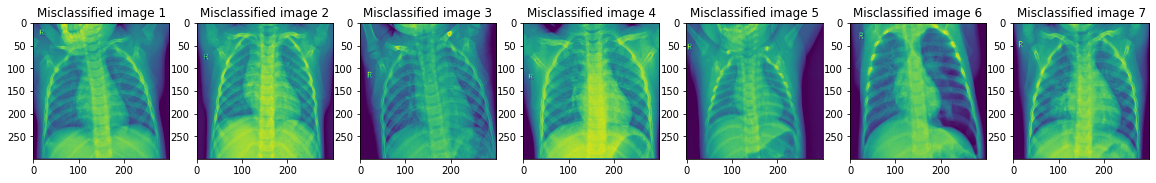

In [30]:
# TODO: YOUR CODE AND YOUR ANSWER

predictions = clf.predict(testing_data)
misclassified_images=[]

for i in range(predictions.size):
  if predictions[i]!=testing_target[i]:
    misclassified_images.append(testing_data[i].reshape(300,300))

fig2, axs2 = plt.subplots(1,len(misclassified_images),figsize=(20,20))

for i in range(len(misclassified_images)):
  axs2[i].imshow(misclassified_images[i])
  axs2[i].set_title(f"Misclassified image {i+1}")

According to me, these images are misclassified because they are not clear in displaying the pneumonic lungs. Maybe there could be something related to their contrast which causes this misclassification as the edges of the regions are not detected accurately when the contrast between them is low.

In [31]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [32]:
# TODO: YOUR ANSWER



*   We can add more data. It is one of the easiest way to improve classification accuracy. 
*   We can do some hyperparameter tuning of the classifier. This means changing the no. of trees, tree depth etc.
*   We can use cross-validation which will reiterate the data over and over to enhance results.
*   We can also increase the sharpness and clarity of the images itself by using some image processing to make different regions more clearer to get identified.





# References 



*   https://www.ibm.com/cloud/learn/random-forest#toc-how-it-wor-nIcKpuXp
*   https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/
*   https://www.datasciencelearner.com/how-to-improve-accuracy-of-random-forest-classifier/





In [33]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw